In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\karth\OneDrive\my projects\data science\Social_Network_Ads.csv")

In [3]:
data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

##### this is a unknown data set which i don't know what it tellss but from the attributes present in this i can conclude that there are customer id and age and their salary are given by which we have to predict that they have or can purchase the product or anything

In [4]:
data.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [5]:
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [6]:
data.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.shape

(400, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
data.duplicated().sum()

0

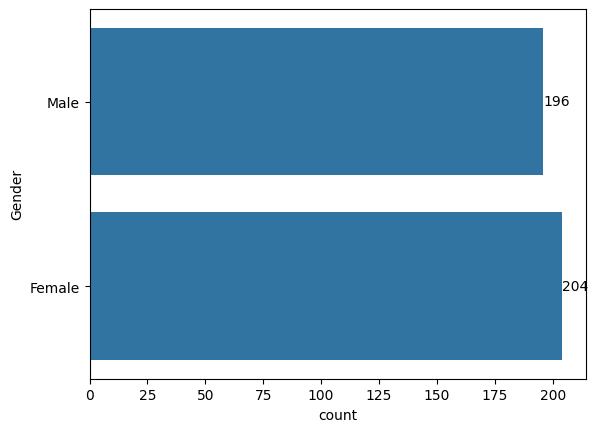

In [11]:
ax = sns.countplot(data["Gender"])

for bars in ax.containers:
    ax.bar_label(bars)

#### univariate analysis

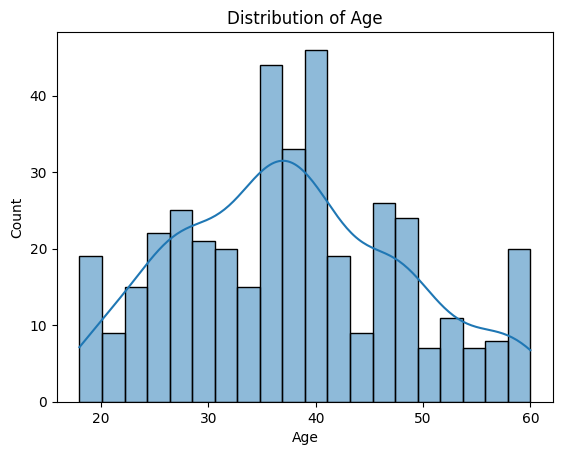

In [12]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


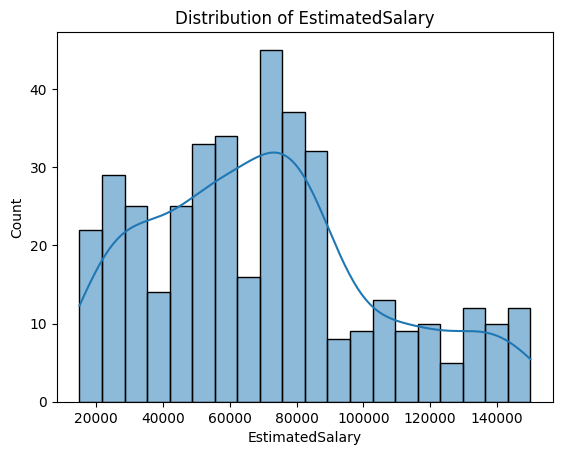

In [13]:
sns.histplot(data['EstimatedSalary'], bins=20, kde=True)
plt.title('Distribution of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis:

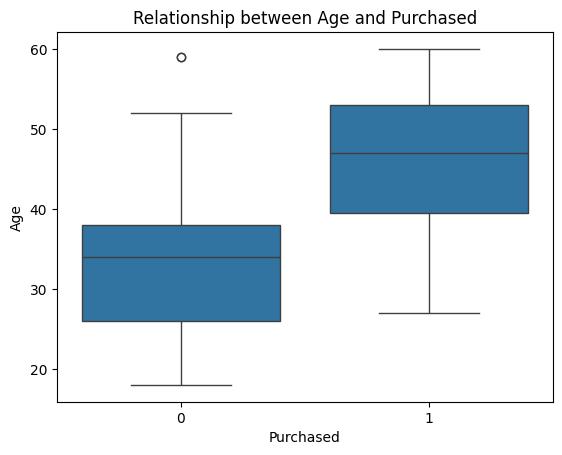

In [14]:
sns.boxplot(x='Purchased', y='Age', data=data)
plt.title('Relationship between Age and Purchased')
plt.show()


#### Multivariate Analysis:

##### encoding is required for male clm ,doing this we'll encode and see this 

In [15]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(data, height=height, aspect=aspect)
    
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

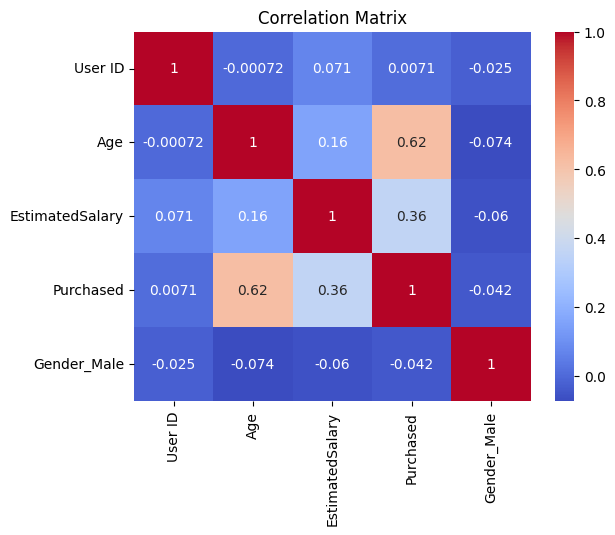

In [16]:
# One-hot encode the 'Gender' column
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### spliting of data into test data and the train data to perform the scaling or encoding we'll ignore the gender column for now

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.drop(['Purchased','Gender'],axis=1),data['Purchased'],test_size=0.3,random_state=0)


In [18]:
x_train.shape,x_test.shape

((280, 3), (120, 3))

# standard scalar

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(x_train)

x_train_tranformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)




In [31]:
scaler.mean_

array([1.56917817e+07, 3.78642857e+01, 6.98071429e+04])

In [32]:
x_train

User ID  Age  EstimatedSalary
92   15809823   26            15000
223  15593715   60           102000
234  15619407   38           112000
232  15813113   40           107000
377  15800215   42            53000
..        ...  ...              ...
323  15619465   48            30000
192  15779581   29            43000
117  15591433   36            52000
47   15776348   27            54000
172  15794661   26           118000

[280 rows x 3 columns]

In [33]:
x_train_tranformed

array([[ 1.67118864e+00, -1.16317240e+00, -1.58497030e+00],
       [-1.38839503e+00,  2.17018137e+00,  9.30986724e-01],
       [-1.02465642e+00,  1.33054037e-02,  1.22017719e+00],
       [ 1.71776734e+00,  2.09385037e-01,  1.07558195e+00],
       [ 1.53516184e+00,  4.05464670e-01, -4.86046541e-01],
       [-1.05683679e+00, -2.80814046e-01, -3.12532264e-01],
       [ 3.23874887e-01,  9.93703570e-01, -8.33075096e-01],
       [ 1.46554862e+00,  9.93703570e-01,  1.85639620e+00],
       [ 1.53940914e+00,  1.33054037e-02,  1.24909623e+00],
       [ 1.38792217e+00, -8.69052946e-01,  2.26126285e+00],
       [-1.71742331e-01, -1.16317240e+00, -1.58497030e+00],
       [-7.91253235e-01,  2.17018137e+00, -8.04156050e-01],
       [-1.70199146e-01, -1.35925203e+00, -1.46929411e+00],
       [ 1.38112224e-01,  4.05464670e-01,  2.29018190e+00],
       [-3.55452132e-01,  7.97623937e-01,  7.57472446e-01],
       [-1.39831955e+00, -9.67092763e-01, -3.12532264e-01],
       [-9.79663379e-01,  1.11345220e-01

In [35]:
x_train_tranformed = pd.DataFrame(x_train_tranformed, columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_test.columns)

In [36]:
x_train_tranformed

User ID       Age  EstimatedSalary
0    1.671189 -1.163172        -1.584970
1   -1.388395  2.170181         0.930987
2   -1.024656  0.013305         1.220177
3    1.717767  0.209385         1.075582
4    1.535162  0.405465        -0.486047
..        ...       ...              ...
275 -1.023835  0.993704        -1.151185
276  1.243033 -0.869053        -0.775237
277 -1.420703 -0.182774        -0.514966
278  1.197261 -1.065133        -0.457127
279  1.456530 -1.163172         1.393691

[280 rows x 3 columns]

In [37]:
x_test_transformed

User ID       Age  EstimatedSalary
0    0.479637 -0.771013         0.497201
1   -0.557553  0.013305        -0.572804
2    1.204283 -0.280814         0.150172
3    0.660686 -0.771013         0.265849
4   -0.761381 -0.280814        -0.572804
..        ...       ...              ...
115 -0.789413  1.091743        -0.139018
116  1.747824  0.699584         1.769639
117  1.444524 -0.672973         0.555039
118 -1.046318  0.797624         0.352606
119 -0.878379  0.895664        -0.543885

[120 rows x 3 columns]

In [39]:
np.round(x_train.describe(), 1)

User ID    Age  EstimatedSalary
count       280.0  280.0            280.0
mean   15691781.7   37.9          69807.1
std       70759.6   10.2          34641.2
min    15569641.0   18.0          15000.0
25%    15628197.2   30.0          43000.0
50%    15694424.0   37.0          70500.0
75%    15751110.8   46.0          88000.0
max    15814816.0   60.0         150000.0

In [42]:
np.round(x_train_tranformed.describe(), 1)

User ID    Age  EstimatedSalary
count    280.0  280.0            280.0
mean       0.0    0.0              0.0
std        1.0    1.0              1.0
min       -1.7   -1.9             -1.6
25%       -0.9   -0.8             -0.8
50%        0.0   -0.1              0.0
75%        0.8    0.8              0.5
max        1.7    2.2              2.3

# Effect of Scaling

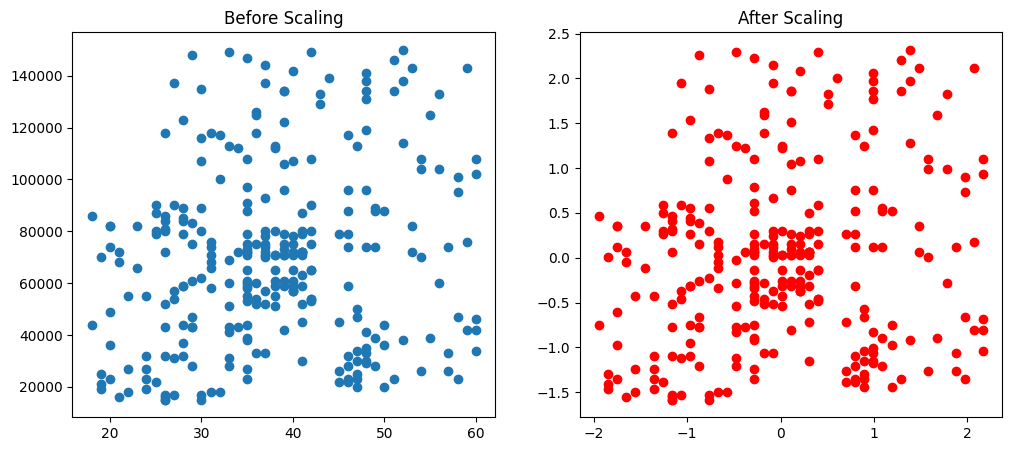

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_tranformed['Age'], x_train_tranformed['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

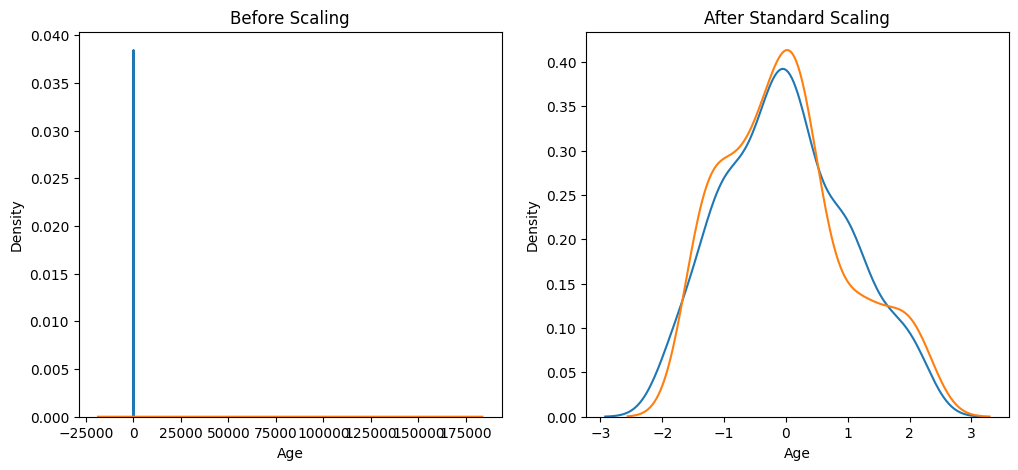

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_tranformed['Age'], ax=ax2)
sns.kdeplot(x_train_tranformed['EstimatedSalary'], ax=ax2)
plt.show()

## prediction model required